In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pima = pd.read_csv('./data/pima.csv')

In [3]:
pima

,怀孕次数,葡萄糖浓度,舒张压,三头肌皮褶厚度,胰岛素浓度,体重指数,糖尿病家族函数,年龄,是否患糖尿病
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


array([[<AxesSubplot:title={'center':'怀孕次数'}>,
        <AxesSubplot:title={'center':'葡萄糖浓度'}>,
        <AxesSubplot:title={'center':'舒张压'}>],
       [<AxesSubplot:title={'center':'三头肌皮褶厚度'}>,
        <AxesSubplot:title={'center':'胰岛素浓度'}>,
        <AxesSubplot:title={'center':'体重指数'}>],
       [<AxesSubplot:title={'center':'糖尿病家族函数'}>,
        <AxesSubplot:title={'center':'年龄'}>,
        <AxesSubplot:title={'center':'是否患糖尿病'}>]], dtype=object)

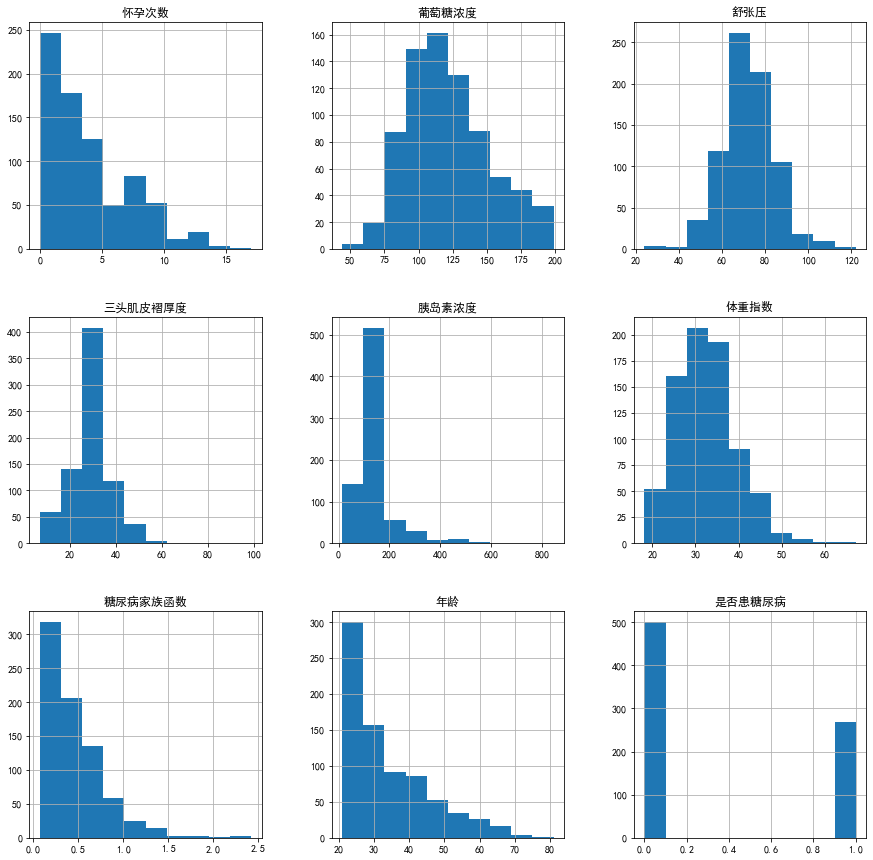

In [4]:
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei']   #防止中文标签乱码
pima.hist(figsize=(15, 15))

In [5]:
pima.describe()

,怀孕次数,葡萄糖浓度,舒张压,三头肌皮褶厚度,胰岛素浓度,体重指数,糖尿病家族函数,年龄,是否患糖尿病
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'怀孕次数'}>,
        <AxesSubplot:title={'center':'葡萄糖浓度'}>,
        <AxesSubplot:title={'center':'舒张压'}>],
       [<AxesSubplot:title={'center':'三头肌皮褶厚度'}>,
        <AxesSubplot:title={'center':'胰岛素浓度'}>,
        <AxesSubplot:title={'center':'体重指数'}>],
       [<AxesSubplot:title={'center':'糖尿病家族函数'}>,
        <AxesSubplot:title={'center':'年龄'}>,
        <AxesSubplot:title={'center':'是否患糖尿病'}>]], dtype=object)

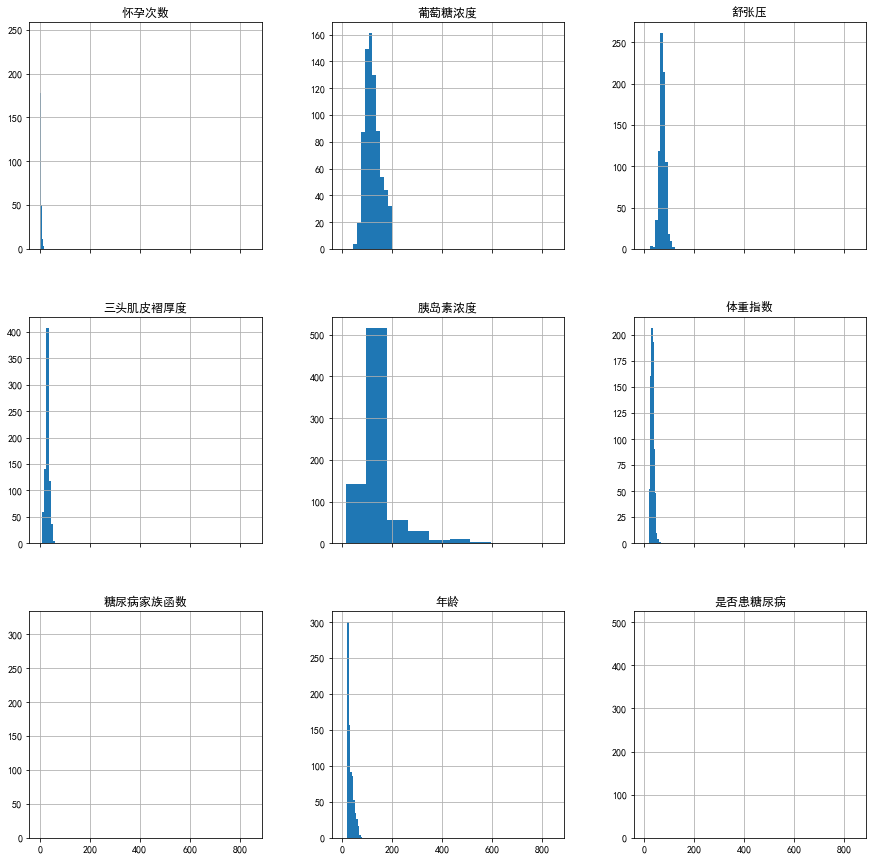

In [6]:
# x轴相同
pima.hist(figsize=(15, 15), sharex=True)

In [7]:
pima['葡萄糖浓度'].head()

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: 葡萄糖浓度, dtype: float64

In [8]:
# z分数标准化前的均值和标准差
pima['葡萄糖浓度'].mean(),pima['葡萄糖浓度'].std()

(121.68676277850591, 30.435948867207657)

Text(0.5, 1.0, '处理前葡萄糖浓度分布')

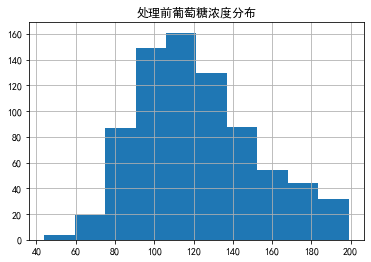

In [9]:
ax = pima['葡萄糖浓度'].hist()
ax.set_title('处理前葡萄糖浓度分布')

In [10]:
#内置的z分数归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
葡萄糖浓度_zscore = scaler.fit_transform(pima[['葡萄糖浓度']])
葡萄糖浓度_zscore.mean(),葡萄糖浓度_zscore.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Z Score后葡萄糖浓度分布')

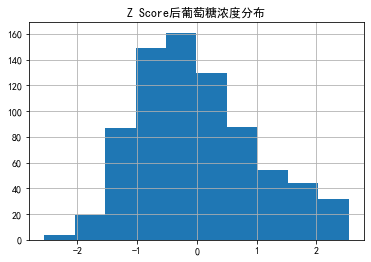

In [11]:
ax = pd.Series(葡萄糖浓度_zscore.reshape(-1,)).hist()
ax.set_title('Z Score后葡萄糖浓度分布')

array([[<AxesSubplot:title={'center':'怀孕次数'}>,
        <AxesSubplot:title={'center':'葡萄糖浓度'}>,
        <AxesSubplot:title={'center':'舒张压'}>],
       [<AxesSubplot:title={'center':'三头肌皮褶厚度'}>,
        <AxesSubplot:title={'center':'胰岛素浓度'}>,
        <AxesSubplot:title={'center':'体重指数'}>],
       [<AxesSubplot:title={'center':'糖尿病家族函数'}>,
        <AxesSubplot:title={'center':'年龄'}>,
        <AxesSubplot:title={'center':'是否患糖尿病'}>]], dtype=object)

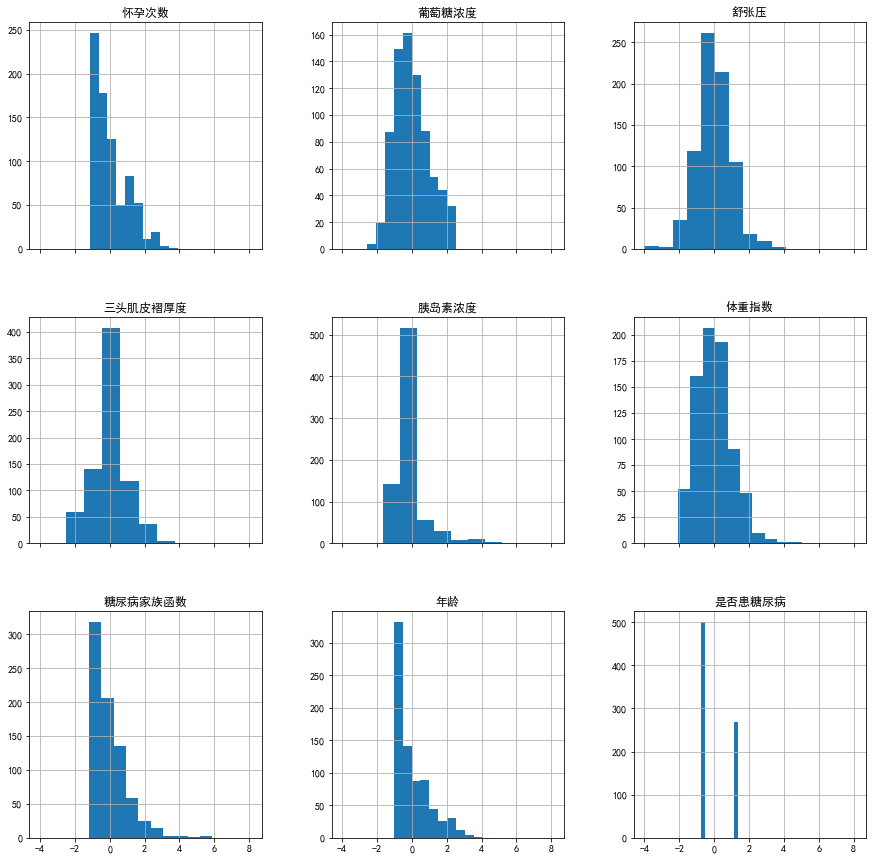

In [12]:
pima_zscore = pd.DataFrame(scaler.fit_transform(pima),columns = pima.columns.values)
pima_zscore.hist(figsize=(15,15), sharex=True)

In [13]:
#导入sklearn模块
from sklearn.preprocessing import MinMaxScaler
#实例化
min_max = MinMaxScaler()
#使用min-max 标准化
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima), columns=pima.columns.values)
#得到描述性统计
pima_min_maxed.describe()

,怀孕次数,葡萄糖浓度,舒张压,三头肌皮褶厚度,胰岛素浓度,体重指数,糖尿病家族函数,年龄,是否患糖尿病
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
np.sqrt((pima**2).sum(axis=1)).mean()  

223.36222025823747

In [15]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer()
pima_normalized = pd.DataFrame(normalize.fit_transform(pima), columns=pima.columns.values)

In [16]:
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0